In [1]:
from main16_format_transform import main

In [2]:
# map, provider, consumer_vector, transmitter_vector = main(conf_file="../24_01_02考虑转弯代价/main15_other_map1.txt")
# map, provider, consumer_vector, transmitter_vector = main(conf_file="../23_12_22路径优化/main7_map_input.txt")
# map, provider, consumer_vector, transmitter_vector = main(conf_file="../23_12_22路径优化/main7_map_input_error.txt")
map, provider, consumer_vector, transmitter_vector = main(conf_file="main16_format_transform.txt")

manhattan_scale 52
1 35
2 50
3 50
4 36
5 36
4
4 0 1 0 1 0 
3 0 1 0 2 2 
3 1 2 0 3 1 0 4 2 
1 1 3 1 1 1 1 2 1 1 3 2 
3 4 2 1 4 2 1 5 2 
T1: 2; tmp_cost: 0
T2: 2; tmp_cost: 2
T3: 1; tmp_cost: 2
T4: 2; tmp_cost: 0
time score: 3.2
cost score: 16
656601.3584898136


In [3]:
def dfs(map, x, y, provider, consumer_vector, transmitter_vector):
    edge_list = []
    node = map.node_matrix[x][y]
    if node.node_type == "CONSUMER":
        return
    else:
        source = (x,y)
        # 提取分支点的分支列表
        if node.node_type == "PROVIDER":
            target_vector = provider.target_vector
        else:
            target_vector = transmitter_vector[node.type_id-1].target_vector
        for target_item in target_vector:
            if target_item[0] == 0:
                # Transmitter
                target_obj = transmitter_vector[target_item[1]-1]
                tmp_edge_list = dfs(map, target_obj.x, target_obj.y, provider, consumer_vector, transmitter_vector)
                edge_list += tmp_edge_list
            else:
                # Consumer
                target_obj = consumer_vector[target_item[1]-1]
            target = (target_obj.x, target_obj.y)
            edge_list.append([(source, target), target_item[2]])
    return edge_list

# 从Provider开始DFS
def dfs_format(map, provider, consumer_vector, transmitter_vector):
    edge_list = dfs(map, provider.x, provider.y, provider, consumer_vector, transmitter_vector)
    return edge_list
   
edge_list = dfs_format(map, provider, consumer_vector, transmitter_vector)
edge_list

[[((1, 1), (0, 1)), 1],
 [((1, 1), (1, 0)), 1],
 [((1, 1), (1, 2)), 2],
 [((3, 1), (1, 1)), 1],
 [((3, 4), (2, 4)), 2],
 [((3, 4), (4, 4)), 2],
 [((3, 1), (3, 4)), 2],
 [((3, 0), (3, 1)), 2],
 [((4, 0), (3, 0)), 0]]

In [17]:
node_dict = {}
for edge in edge_list:
    source = edge[0][0]
    target = edge[0][1]
    if not source in node_dict:
        node = map.node_matrix[source[0]][source[1]]
        tmp_dict = {}
        tmp_dict["node_type"] = node.node_type
        if node.node_type == "PROVIDER":
            label = "P"
        elif node.node_type == "TRANSMITTER":
            transmitter = transmitter_vector[node.type_id-1]
            label = f"T{transmitter.id}({transmitter.need_format})"
        elif node.node_type == "CONSUMER":
            consumer = consumer_vector[node.type_id-1]
            label = f"C{consumer.id}({consumer.code_format})"
        tmp_dict["label"] = label
        node_dict[source] = tmp_dict
    if not target in node_dict:
        node = map.node_matrix[target[0]][target[1]]
        tmp_dict = {}
        tmp_dict["node_type"] = node.node_type
        if node.node_type == "PROVIDER":
            label = "P"
        elif node.node_type == "TRANSMITTER":
            transmitter = transmitter_vector[node.type_id-1]
            label = f"T{transmitter.id}({transmitter.need_format})"
        elif node.node_type == "CONSUMER":
            consumer = consumer_vector[node.type_id-1]
            label = f"C{consumer.id}({consumer.code_format})"
        tmp_dict["label"] = label
        node_dict[target] = tmp_dict
node_dict

{(1, 1): {'node_type': 'TRANSMITTER', 'label': 'T3(1)'},
 (0, 1): {'node_type': 'CONSUMER', 'label': 'C1(1)'},
 (1, 0): {'node_type': 'CONSUMER', 'label': 'C2(1)'},
 (1, 2): {'node_type': 'CONSUMER', 'label': 'C3(2)'},
 (3, 1): {'node_type': 'TRANSMITTER', 'label': 'T2(2)'},
 (3, 4): {'node_type': 'TRANSMITTER', 'label': 'T4(2)'},
 (2, 4): {'node_type': 'CONSUMER', 'label': 'C4(2)'},
 (4, 4): {'node_type': 'CONSUMER', 'label': 'C5(2)'},
 (3, 0): {'node_type': 'TRANSMITTER', 'label': 'T1(2)'},
 (4, 0): {'node_type': 'PROVIDER', 'label': 'P'}}

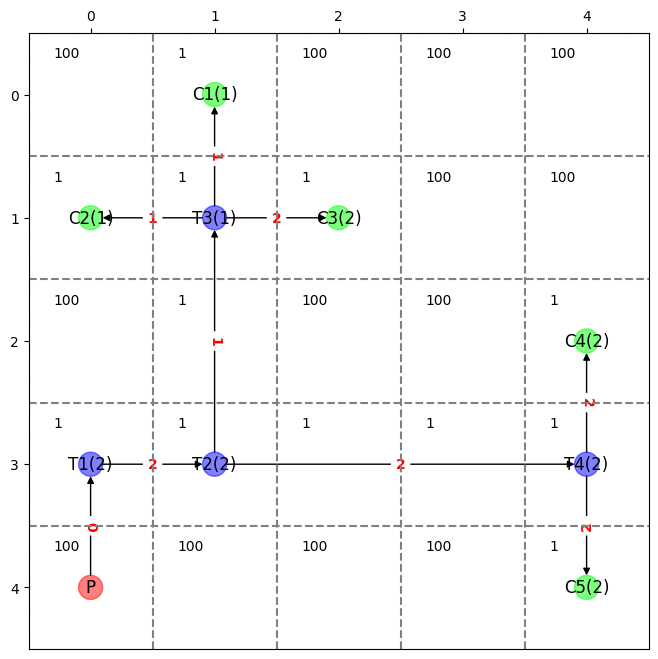

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
figure, ax = plt.subplots(figsize=(8,8))

# 对象创建
G = nx.DiGraph()
pos = {}
# 添加边
for edge in edge_list:
    G.add_edge(edge[0][0], edge[0][1], format=edge[1])
for k, v in node_dict.items():
    G.add_node(k, **v)
    pos[k] = (k[1], k[0]) 

# 结点绘制
color_dict = {
    "PROVIDER" : "#FF000080",
    "CONSUMER" : "#00FF0080",
    "TRANSMITTER" : "#0000FF80",
}
node_color_list = [color_dict[i] for i in nx.get_node_attributes(G, "node_type").values()]
node_label_dict =  nx.get_node_attributes(G, "label")
edge_label_dict = nx.get_edge_attributes(G, "format")
nx.draw(G, pos, node_color=node_color_list, labels=node_label_dict) # 绘制结点
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_label_dict, font_color="red", font_weight="bold") 

# 网格线设置
N = map.N
positions = [i-0.5 for i in range(N)]
for pos in positions:
    ax.axhline(y=pos, color="grey", linestyle="--")
    ax.axvline(x=pos, color="grey", linestyle="--")

# 网格中单元格代价绘制
for i in range(N):
    for j in range(N):
        node = map.node_matrix[i][j]
        text = str(node.weight)
        x = node.x-0.3
        y = node.y-0.3
        ax.text(y, x, text) # 稍微偏移

# 刻度设置
ax.axis("on")
ax.set_xlim(left=-0.5, right=N-0.5) # 设置坐标轴范围，自动设置为整数
ax.set_ylim(bottom=N-0.5, top=-0.5)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.xaxis.tick_top() # 坐标原点移动到左上角
plt.show()